<a href="https://colab.research.google.com/github/chrisseiler96/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head()


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [4]:
df.tail(1).T

,80052
timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38


In [5]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-08-17 03:10:02.146363
freq                               1
Name: timestamp, dtype: object

In [6]:
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [7]:
df.set_index('timestamp',inplace=True)
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [8]:
df.category.value_counts()

Males under 18        4216
Non-US users          4216
US users              4216
IMDb users            4216
Aged 45+              4216
Males Aged 18-29      4216
Aged under 18         4216
Females               4216
IMDb staff            4216
Top 1000 voters       4216
Aged 18-29            4216
Females Aged 30-44    4216
Females Aged 45+      4216
Males                 4216
Females Aged 18-29    4216
Males Aged 45+        4216
Males Aged 30-44      4216
Aged 30-44            4216
Females under 18      4165
Name: category, dtype: int64

In [11]:
df.link.value_counts()

http://www.imdb.com/title/tt6322922/ratings-age_3            4216
http://www.imdb.com/title/tt6322922/ratings-age_4            4216
http://www.imdb.com/title/tt6322922/ratings-usa              4216
http://www.imdb.com/title/tt6322922/ratings-age_1            4216
http://www.imdb.com/title/tt6322922/ratings-male_age_2       4216
http://www.imdb.com/title/tt6322922/ratings-male             4216
http://www.imdb.com/title/tt6322922/ratings-age_2            4216
http://www.imdb.com/title/tt6322922/ratings-female_age_2     4216
http://www.imdb.com/title/tt6322922/ratings-male_age_1       4216
http://www.imdb.com/title/tt6322922/ratings-female_age_4     4216
http://www.imdb.com/title/tt6322922/ratings                  4216
http://www.imdb.com/title/tt6322922/ratings-top_1000         4216
http://www.imdb.com/title/tt6322922/ratings-imdb_staff       4216
http://www.imdb.com/title/tt6322922/ratings-female_age_3     4216
http://www.imdb.com/title/tt6322922/ratings-male_age_3       4216
http://www

In [9]:
df[df.category =='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,...,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,...,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,...,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,...,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,...,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


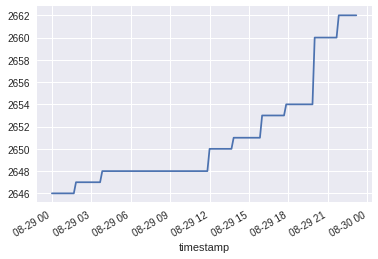

In [10]:
lastday = df['2017-08-29']
lastday[lastday.category=='IMDb users'].respondents.plot();

In [0]:
final_entry = df.tail(1)

In [16]:
columns = ['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct']
final_entry[columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [17]:
final_entry[columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


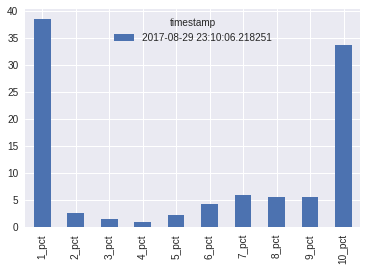

In [19]:
data = final_entry[columns].T
data.plot.bar()

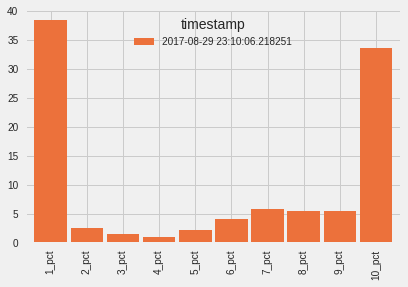

In [23]:
plt.style.use('fivethirtyeight')

ax = data.plot.bar(color='#EC713B',width= 0.9)



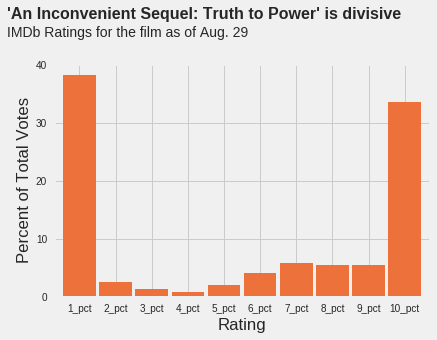

In [29]:
plt.style.use('fivethirtyeight')

ax = data.plot.bar(color='#EC713B',width= 0.9, legend=False)

ax.set(xlabel= 'Rating',
      ylabel= 'Percent of Total Votes',
      yticks= range(0,50,10));
ax.text(x=-2,y=48, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')
ax.text(x=-2,y=45, s='IMDb Ratings for the film as of Aug. 29')
ax.tick_params(labelrotation=0)

In [0]:
data.index = range(1,11)

In [39]:
plt.style.available

['seaborn-pastel',
 'classic',
 'seaborn-ticks',
 'ggplot',
 'seaborn-poster',
 'seaborn-notebook',
 'Solarize_Light2',
 'seaborn-muted',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-dark',
 'seaborn',
 'seaborn-deep',
 'bmh',
 'fast',
 '_classic_test',
 'seaborn-talk',
 'seaborn-paper',
 'seaborn-darkgrid',
 'grayscale',
 'dark_background']

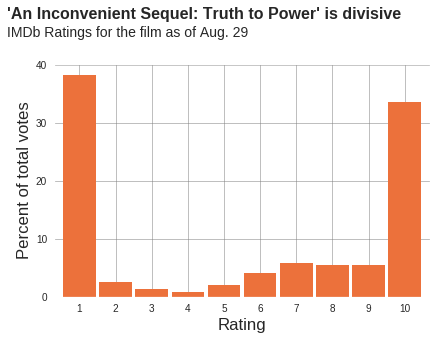

In [53]:
plt.style.use(['fivethirtyeight','seaborn-white'])

ax = data.plot.bar(color='#EC713B',width= 0.9, legend=False)

ax.set(xlabel= 'Rating',
      ylabel= 'Percent of total votes',
      yticks= range(0,50,10),
      facecolor= 'w');
ax.text(x=-2,y=48, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')
ax.text(x=-2,y=45, s='IMDb Ratings for the film as of Aug. 29')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('w')
ax.spines['left'].set_color('w')

ax.tick_params(labelrotation=0)
